In [2]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py

--2025-02-17 06:48:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/refs/heads/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-02-17 06:48:39 (85.5 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [4]:
from helper_functions import unzip_data, plot_loss_curves, compare_historys

In [5]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2025-02-17 06:48:51--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 108.177.11.207, 172.217.204.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2025-02-17 06:48:52 (105 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



In [6]:
unzip_data("nlp_getting_started.zip")

In [7]:
import pandas as pd

In [8]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [9]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
train_df["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [11]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)

In [12]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [13]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [14]:
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [15]:
len(train_df), len(test_df)

(7613, 3263)

In [16]:
import random

In [17]:
random_index = random.randint(0, len(train_df) - 5)

for row in train_df_shuffled[['text', 'target']][random_index:random_index + 5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
Psalm34:22 The Lord redeemeth the soul of his servants: and none of them that trust in him shall be desolate.

---

Target: 1 (real disaster)
Text:
#Sismo ML 2.4  NEAR THE COAST OF WESTERN TURKEY: MagnitudeåÊåÊML 2.4RegionåÊåÊNEAR THE COAST OF WESTERN TURKEY... http://t.co/0wdAzLcM90 #CS

---

Target: 1 (real disaster)
Text:
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...

---

Target: 0 (not real disaster)
Text:
What is the biggest regret you have in hearthstone? http://t.co/vcIrn1Md8v

---

Target: 0 (not real disaster)
Text:
The possible new jerseys for the Avalanche next year. ???? http://t.co/nruzhR5XQu

---



In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(
    train_df_shuffled["text"].to_numpy(),
    train_df_shuffled["target"].to_numpy(),
    test_size = 0.1,
    random_state=42
)

In [20]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [21]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [23]:
text_vectorizer = TextVectorization(
    max_tokens=10000,
    standardize = "lower_and_strip_punctuation",
    split="whitespace",
    ngrams =None,
    output_mode = "int",
    output_sequence_length = None,
    pad_to_max_tokens=True
    )

In [24]:
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [25]:
max_vocab_length = 10000
max_length = 15

In [26]:
text_vectorizer = TextVectorization(
    max_tokens=max_vocab_length,
    output_mode="int",
    output_sequence_length=max_length
)

In [27]:
text_vectorizer.adapt(train_sentences)

In [28]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [29]:
random_sentence = random.choice(train_sentences)
print(f"Original Text: \n {random_sentence}\
        \n\nVectorized Version: ")
text_vectorizer([random_sentence])

Original Text: 
 @eac4AU You can now PRE-ORDER the film on ITUNES &amp; watch 9/15!! YAY! http://t.co/fVP3Wnid4L http://t.co/bwdhIBtiKs http://t.co/qelROcI7by        

Vectorized Version: 


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,   12,   71,   48, 4871,    2,  953,   11, 2080,   35,  135,
           1, 2216,    1,    1]])>

In [30]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_word = words_in_vocab[:5]
bottom_5_word = words_in_vocab[-5:]

In [31]:
len(words_in_vocab)

10000

In [32]:
top_5_word

['', '[UNK]', 'the', 'a', 'in']

In [33]:
bottom_5_word

['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']

In [34]:
from tensorflow.keras import layers

In [35]:
embedding = layers.Embedding(
  input_dim = max_vocab_length,
  output_dim = 128,
  input_length = max_length
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [36]:
embedding

<Embedding name=embedding, built=False>

In [37]:
random_sentence = random.choice(train_sentences)
print(f"Original Text: \n {random_sentence}\
        \n\Embeded Version: ")

sample_embeded = embedding(text_vectorizer([random_sentence]))
sample_embeded

Original Text: 
 ME says many of these wounds could be fatal some rather quickly others slower and a couple not lethal at all. #KerrickTrial        
\Embeded Version: 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.01497648, -0.01542764,  0.01265169, ..., -0.00622724,
          0.03982573, -0.04828671],
        [ 0.02572001,  0.01298388, -0.04616886, ...,  0.01407709,
         -0.01718341,  0.02132579],
        [-0.00163902, -0.04089798, -0.03831761, ..., -0.02682045,
          0.00301956, -0.04641508],
        ...,
        [-0.04348234, -0.03649525, -0.02835437, ...,  0.01348536,
         -0.00804148,  0.02349195],
        [ 0.01327559,  0.02315727,  0.04212699, ...,  0.01978307,
          0.04526654, -0.01695909],
        [-0.01483963,  0.03729867,  0.02437229, ...,  0.00150203,
          0.04693511, -0.00062038]]], dtype=float32)>

In [38]:
sample_embeded[0][0], sample_embeded[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.01497648, -0.01542764,  0.01265169, -0.01373019,  0.04720444,
         0.01404924, -0.04500192,  0.01163068,  0.04489735, -0.01112907,
        -0.0359915 ,  0.03026411, -0.04279016,  0.01469541, -0.0411735 ,
         0.01226188,  0.03731326,  0.0310647 ,  0.02130759, -0.00351612,
         0.03017824, -0.0321594 ,  0.01486685, -0.01365297, -0.03585108,
         0.02211184,  0.03115034,  0.01453053,  0.01796819,  0.02399107,
        -0.03532419, -0.02044619,  0.04476316, -0.03738289,  0.00733336,
         0.04758519,  0.00285957,  0.02557205,  0.00631398,  0.01901943,
         0.02799375,  0.01833042,  0.02741069,  0.03879659,  0.02392549,
        -0.02105665, -0.0012452 , -0.00628158,  0.01324989, -0.02568445,
        -0.00907516, -0.04270358,  0.02606174, -0.04024253, -0.00205619,
        -0.02609572,  0.0438324 , -0.02660706, -0.03690064, -0.03678918,
        -0.03327836, -0.04938626, -0.00338626, -0.03387884,  0.00982835,
  

# Model 0: Getting a Base Line

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

In [ ]:
model_0.fit(
    train_sentences,
    train_labels
    )

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Accuracy : {baseline_score * 100:.2f}%")

Accuracy : 79.27%


In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [40]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [39]:
def calculate_results(y_true,y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

  model_result = {
      "accuracy": model_accuracy,
      "precision": model_precision,
      "recall": model_recall,
      "f1-score": model_f1
      }

  return model_result

In [ ]:
baseline_results = calculate_results(y_true=val_labels, y_pred=baseline_preds)
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1-score': 0.7862189758049549}

# Model 1: First Forward Neural Network (Dense Model)

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,280,129 (4.88 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1.compile(
  loss="binary_crossentropy",
  optimizer=tf.keras.optimizers.Adam(),
  metrics = ["accuracy"]
)

In [ ]:
model_1_history = model_1.fit(
    x=train_sentences,
    y=train_labels,
    epochs = 5,
    validation_data=(val_sentences, val_labels),
    callbacks=[]
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6424 - loss: 0.6506 - val_accuracy: 0.7493 - val_loss: 0.5358
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8150 - loss: 0.4613 - val_accuracy: 0.7848 - val_loss: 0.4699
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8572 - loss: 0.3598 - val_accuracy: 0.7861 - val_loss: 0.4585
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.8908 - loss: 0.2845 - val_accuracy: 0.7900 - val_loss: 0.4581
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9122 - loss: 0.2359 - val_accuracy: 0.7861 - val_loss: 0.4751


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7762 - loss: 0.5070


[0.4751178026199341, 0.7860892415046692]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


array([[4.20303732e-01],
       [8.00084233e-01],
       [9.97858644e-01],
       [1.17562652e-01],
       [1.21952869e-01],
       [9.37925816e-01],
       [9.25499737e-01],
       [9.92391825e-01],
       [9.65388417e-01],
       [2.40037814e-01],
       [1.19457409e-01],
       [6.85832024e-01],
       [6.89637065e-02],
       [2.43490189e-01],
       [5.41725615e-03],
       [1.67235985e-01],
       [3.66511680e-02],
       [7.62513578e-02],
       [2.40142182e-01],
       [5.68792820e-01],
       [9.10836577e-01],
       [4.77827452e-02],
       [4.17613894e-01],
       [8.37400928e-02],
       [9.56033349e-01],
       [9.98985589e-01],
       [3.23894247e-02],
       [7.66114444e-02],
       [3.50705385e-02],
       [1.89727977e-01],
       [5.64758480e-01],
       [2.31542513e-01],
       [4.60614353e-01],
       [1.66829214e-01],
       [5.25748312e-01],
       [5.65668084e-02],
       [9.94398713e-01],
       [1.33886755e-01],
       [3.59845571e-02],
       [9.98722553e-01],


In [ ]:
model_1_pred_probs.shape

(762, 1)

In [ ]:
model_1_pred_probs[0]

array([0.42030373], dtype=float32)

In [ ]:
val_labels[0]

0

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
model_1_results = calculate_results(
  y_true=val_labels,
  y_pred = model_1_preds
)

model_1_results

{'accuracy': 0.7860892388451444,
 'precision': 0.7895616761419161,
 'recall': 0.7860892388451444,
 'f1-score': 0.7835741000287678}

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [ ]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

In [ ]:
import io

In [ ]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 2: Recurrent Neural Network (LSTM)

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_lstm")

In [ ]:
model_2.summary()

Model: "model_2_lstm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

In [ ]:
history_model_2 = model_2.fit(
    x=train_sentences,
    y=train_labels,
    epochs=5,
    validation_data = (val_sentences, val_labels)
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.9113 - loss: 0.2865 - val_accuracy: 0.7808 - val_loss: 0.5500
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9342 - loss: 0.1657 - val_accuracy: 0.7822 - val_loss: 0.7342
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9571 - loss: 0.1218 - val_accuracy: 0.7782 - val_loss: 0.6761
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9599 - loss: 0.1071 - val_accuracy: 0.7730 - val_loss: 0.9157
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.9683 - loss: 0.0836 - val_accuracy: 0.7703 - val_loss: 1.0450


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


array([[2.4542743e-03],
       [8.7102693e-01],
       [9.9988520e-01],
       [2.4684032e-02],
       [5.9760560e-04],
       [9.9977827e-01],
       [9.9028432e-01],
       [9.9992645e-01],
       [9.9987233e-01],
       [2.5023180e-01]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
model_2_results = calculate_results(val_labels, model_2_preds)

In [ ]:
model_2_results

{'accuracy': 0.7703412073490814,
 'precision': 0.7743290047665735,
 'recall': 0.7703412073490814,
 'f1-score': 0.7671895343790688}

# Model 3: Recurrent Neural Network (GRU)

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_gru")

In [ ]:
model_3.summary()

Model: "model_3_gru"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_3.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics = ["accuracy"]
)

In [ ]:
model_3.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels)
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.8884 - loss: 0.2586 - val_accuracy: 0.7756 - val_loss: 0.7769
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9733 - loss: 0.0761 - val_accuracy: 0.7769 - val_loss: 0.8804
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9761 - loss: 0.0611 - val_accuracy: 0.7730 - val_loss: 0.8750
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9768 - loss: 0.0587 - val_accuracy: 0.7730 - val_loss: 1.3565
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9774 - loss: 0.0513 - val_accuracy: 0.7717 - val_loss: 1.1083


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [ ]:
model_3_pred_probs[:10]

array([[5.1613194e-03],
       [7.9475892e-01],
       [9.9975389e-01],
       [8.8414408e-02],
       [1.0608013e-04],
       [9.9940133e-01],
       [8.6725217e-01],
       [9.9992812e-01],
       [9.9980676e-01],
       [4.1016856e-01]], dtype=float32)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(val_labels, model_3_preds)

In [ ]:
model_3_results

{'accuracy': 0.7716535433070866,
 'precision': 0.7744533306963004,
 'recall': 0.7716535433070866,
 'f1-score': 0.7690403853056418}

# Model 4: Bidrectional Recurrent Neural Network

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_4.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)

In [ ]:
history_model_4 = model_4.fit(
  x= train_sentences,
  y = train_labels,
  epochs = 5,
  validation_data = (val_sentences, val_labels)
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.9608 - loss: 0.1896 - val_accuracy: 0.7717 - val_loss: 0.9575
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9783 - loss: 0.0525 - val_accuracy: 0.7585 - val_loss: 1.2353
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9800 - loss: 0.0443 - val_accuracy: 0.7795 - val_loss: 1.2433
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9824 - loss: 0.0374 - val_accuracy: 0.7664 - val_loss: 1.2728
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9790 - loss: 0.0455 - val_accuracy: 0.7559 - val_loss: 1.4192


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [ ]:
model_4_pred_probs[:10]

array([[1.2388513e-01],
       [7.6735115e-01],
       [9.9996942e-01],
       [3.1668767e-01],
       [3.4996148e-05],
       [9.9977785e-01],
       [8.9503485e-01],
       [9.9998552e-01],
       [9.9997407e-01],
       [9.9884051e-01]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))

In [ ]:
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(val_labels, model_4_preds)

In [ ]:
model_4_results

{'accuracy': 0.7559055118110236,
 'precision': 0.7559055118110236,
 'recall': 0.7559055118110236,
 'f1-score': 0.7559055118110236}

# Model 5: Convolution Neural Network

In [ ]:
inputs = layers.Input(shape=(1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation="relu", padding="valid", strides=1)(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv_1d")

In [ ]:
model_5.summary()

Model: "model_5_conv_1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 11, 64)              │          41,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 64)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,321,089 (5.04 MB)

 Trainable params: 1,321,089 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_5.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics = ["accuracy"]
)

In [ ]:
history_model_5 = model_5.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels)
)

Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.9378 - loss: 0.1780 - val_accuracy: 0.7756 - val_loss: 0.8980
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9770 - loss: 0.0684 - val_accuracy: 0.7782 - val_loss: 1.0208
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9795 - loss: 0.0552 - val_accuracy: 0.7730 - val_loss: 1.1292
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9738 - loss: 0.0601 - val_accuracy: 0.7625 - val_loss: 1.1770
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9795 - loss: 0.0491 - val_accuracy: 0.7612 - val_loss: 1.2037


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [ ]:
model_5_pred_probs[:10]

array([[2.4868290e-01],
       [7.5529635e-01],
       [9.9985403e-01],
       [6.1291162e-02],
       [1.4517720e-07],
       [9.9613798e-01],
       [9.9172097e-01],
       [9.9996388e-01],
       [9.9999732e-01],
       [6.9335920e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))

In [ ]:
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(val_labels, model_5_preds)

In [ ]:
model_5_results

{'accuracy': 0.7611548556430446,
 'precision': 0.7620839190766789,
 'recall': 0.7611548556430446,
 'f1-score': 0.7592507437677535}

# Model 6: Transfer Learning (USE Feature Extractor)

In [41]:
import tensorflow_hub as hub
import tf_keras as keras

In [42]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [43]:
embed_samples = embed([sample_sentence, "when you can the universal sentence encoder on the sentence"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [44]:
embed_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157025,  0.02485911,  0.02878051, ..., -0.00186124,
         0.02315822, -0.01485021],
       [ 0.04907779, -0.04399762, -0.02896886, ..., -0.0195239 ,
         0.03589679, -0.01340414]], dtype=float32)>

In [45]:
sentence_encoder_layer = hub.KerasLayer(
    "https://tfhub.dev/google/universal-sentence-encoder/4",
    input_shape=[],
    dtype=tf.string,
    trainable=False,
    name="USE"
    )

In [46]:
model_6 = keras.Sequential([
    sentence_encoder_layer,
    keras.layers.Dense(1, activation="sigmoid", name="model_6_use")
])

In [47]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 model_6_use (Dense)         (None, 1)                 513       
                                                                 
Total params: 256798337 (979.61 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [48]:
model_6.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics = ["accuracy"]
)

In [49]:
model_6_history = model_6.fit(
    x = train_sentences,
    y = train_labels,
    epochs = 5,
    validation_data = (val_sentences, val_labels)
)

Epoch 1/5
215/215 [==============================] - 7s 16ms/step - loss: 0.6487 - accuracy: 0.7400 - val_loss: 0.6123 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.5810 - accuracy: 0.7867 - val_loss: 0.5632 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.5383 - accuracy: 0.7923 - val_loss: 0.5314 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.5095 - accuracy: 0.7968 - val_loss: 0.5104 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4894 - accuracy: 0.7990 - val_loss: 0.4959 - val_accuracy: 0.7861


In [50]:
model_6_pred_probs = model_6.predict(val_sentences)

24/24 [==============================] - 1s 10ms/step


In [51]:
model_6_pred_probs[:10]

array([[0.37761715],
       [0.6970808 ],
       [0.8527079 ],
       [0.36237296],
       [0.6524178 ],
       [0.7167885 ],
       [0.8193683 ],
       [0.8465714 ],
       [0.7434983 ],
       [0.20431815]], dtype=float32)

In [52]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))

In [53]:
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [54]:
model_6_results = calculate_results(val_labels, model_6_preds)

In [55]:
model_6_results

{'accuracy': 0.7860892388451444,
 'precision': 0.7863431959164349,
 'recall': 0.7860892388451444,
 'f1-score': 0.7850582651599072}

# Model 7: Transfer Learning (USE Feature Extractor) 10% Of Data

In [ ]:
train_10_percent = train_df[["text", "target"]].sample(frac=0.1, random_state=42)

In [ ]:
len(train_10_percent)

761

In [ ]:
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()

In [ ]:
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [ ]:
train_10_percent_split = int(0.1 * len(train_sentences))

In [ ]:
train_10_percent_split

685

In [ ]:
train_sentences_10_percent = train_sentences[:train_10_percent_split]

In [ ]:
train_sentences_10_percent[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [ ]:
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
train_labels_10_percent[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
model_7 = keras.models.clone_model(model_6)

In [ ]:
model_7.compile(
  loss="binary_crossentropy",
  optimizer="Adam",
  metrics = ["accuracy"]
)

In [ ]:
model_7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 model_6_use (Dense)         (None, 1)                 513       
                                                                 
Total params: 256798337 (979.61 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_7.history = model_7.fit(
    train_sentences_10_percent,
    train_labels_10_percent,
    epochs =5,
    validation_data = (val_sentences, val_labels)
)

Epoch 1/5
22/22 [==============================] - 5s 52ms/step - loss: 0.6875 - accuracy: 0.5766 - val_loss: 0.6824 - val_accuracy: 0.6312
Epoch 2/5
22/22 [==============================] - 0s 23ms/step - loss: 0.6743 - accuracy: 0.7066 - val_loss: 0.6733 - val_accuracy: 0.7113
Epoch 3/5
22/22 [==============================] - 1s 26ms/step - loss: 0.6625 - accuracy: 0.7591 - val_loss: 0.6646 - val_accuracy: 0.7454
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.6512 - accuracy: 0.7839 - val_loss: 0.6566 - val_accuracy: 0.7559
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.6405 - accuracy: 0.7898 - val_loss: 0.6486 - val_accuracy: 0.7598


In [189]:
model_7_pred_probs = model_7.predict(val_sentences)

24/24 [==============================] - 0s 19ms/step


In [190]:
model_7_pred_probs[:10]

array([[0.46832073],
       [0.4976795 ],
       [0.5639199 ],
       [0.47132128],
       [0.49867165],
       [0.5161117 ],
       [0.5420157 ],
       [0.5457627 ],
       [0.5228076 ],
       [0.42492375]], dtype=float32)

In [191]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))

In [192]:
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [193]:
model_7_results = calculate_results(val_labels,model_7_preds)

In [194]:
model_7_results

{'accuracy': 0.7598425196850394,
 'precision': 0.775959443733631,
 'recall': 0.7598425196850394,
 'f1-score': 0.7520224179462837}

# Compare Performance Of Each Models

In [197]:
all_model_results = pd.DataFrame({
    "baseline": baseline_results,
    "simple_dense": model_1_results,
    "lstm": model_2_results,
    "gru": model_3_results,
    "bidrectional": model_4_results,
    "conv1d": model_5_results,
    "use_encoder": model_6_results,
    "use_encoder_10": model_7_results
})

In [203]:
all_model_results = all_model_results.transpose()

In [204]:
all_model_results

,accuracy,precision,recall,f1-score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.786089,0.789562,0.786089,0.783574
lstm,0.770341,0.774329,0.770341,0.767190
gru,0.771654,0.774453,0.771654,0.769040
bidrectional,0.755906,0.755906,0.755906,0.755906
conv1d,0.761155,0.762084,0.761155,0.759251
use_encoder,0.786089,0.786487,0.786089,0.784963
use_encoder_10,0.759843,0.775959,0.759843,0.752022


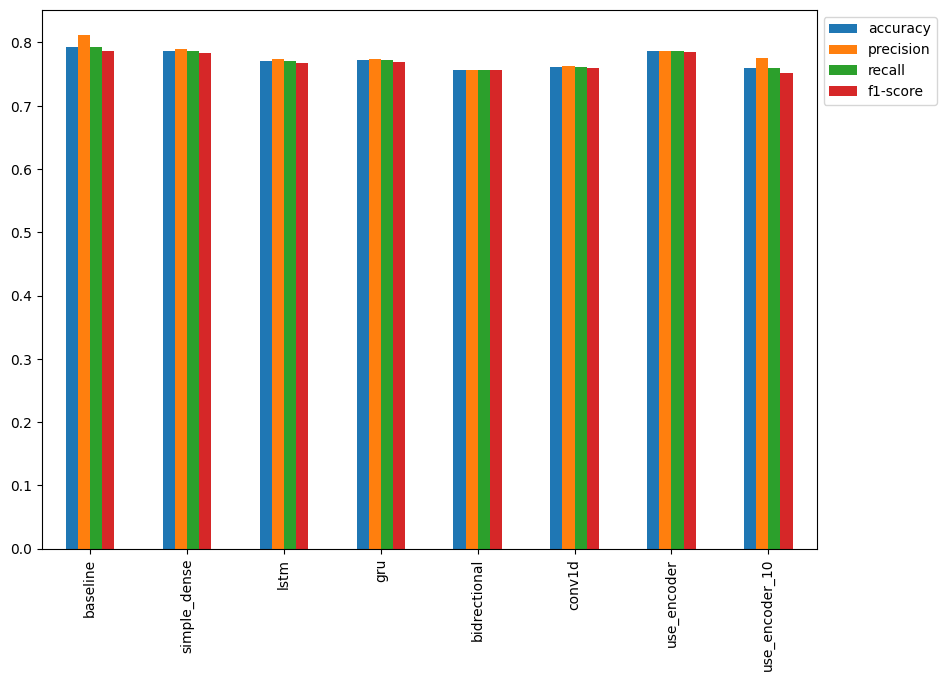

In [205]:
all_model_results.plot(kind = "bar", figsize=(10, 7)).legend(bbox_to_anchor = (1.0,1.0))

# Saving And Load Trained Model

In [56]:
model_6.save("model_6.h5")

/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
loaded_model_6 = keras.models.load_model(
    "model_6.h5",
    custom_objects = {"KerasLayer": hub.KerasLayer}
    )

In [58]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 18ms/step - loss: 0.4959 - accuracy: 0.7861


[0.4959298372268677, 0.7860892415046692]

In [65]:
loaded_model_6.predict(["ml is the best for predictiopn"])

1/1 [==============================] - 0s 71ms/step


array([[0.16351822]], dtype=float32)